# Proposta para entendimento da área de vendas

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv('supermarket_sales.csv')

In [69]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [70]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [72]:
df.shape

(1000, 17)

####Verificar se há dados faltantes

In [73]:
# Não há dados faltantes.
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

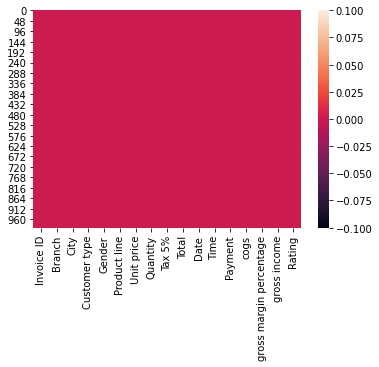

In [74]:
# Visualização gráfica que prova que não há dados faltantes
sns.heatmap(df.isnull())

In [75]:
# Não há duplicates4
df[df.duplicated()]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


####Entendimento das colunas

######O que cada coluna diz?
######Os dados  precisam ser tratados?

In [76]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [77]:
# Tratando as colunas que contém espaços
df.rename(columns={'Invoice ID': 'Invoice_ID', 'Customer type': 'Customer_type', 'Product line': 'Product_line',
                   'Unit price': 'Unit_price', 'Tax 5%': 'Tax_5%', 'gross margin percentage': 'gross_margin_percentage',
                   'gross income': 'gross_income'}, inplace=True)

In [78]:
df.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [79]:
# Invoice_ID -> ID da fatura: Número de identificação da fatura do recibo de venda gerado por computador 

In [80]:
df['Invoice_ID'].to_frame().head()

,Invoice_ID
0,750-67-8428
1,226-31-3081
2,631-41-3108
3,123-19-1176
4,373-73-7910


In [81]:
df['Invoice_ID'].dtype

dtype('O')

In [82]:
df['Invoice_ID'] = df['Invoice_ID'].apply(lambda x: x.replace('-', ''))
df['Invoice_ID'] = df['Invoice_ID'].astype(int)

In [83]:
df['Invoice_ID'].dtype

dtype('int64')

In [84]:
len(df['Invoice_ID'].unique())

1000

Não há valores repetidos de faturas

In [85]:
df.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750678428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226313081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631413108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123191176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373737910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [86]:
# Branch -> Filial do supercentro (estão disponíveis 3 filiais identificadas por A, B e C).
df['Branch'].dtype

dtype('O')

In [87]:
df['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [88]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

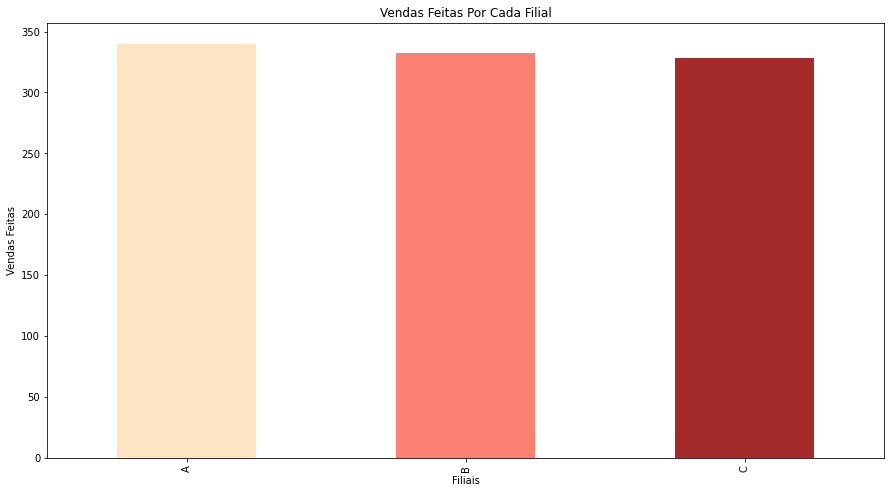

In [89]:
df['Branch'].value_counts().plot(kind='bar', color=['bisque', 'salmon','brown'] ,figsize=(15, 8),
                                 title='Vendas Feitas Por Cada Filial', xlabel='Filiais',
                                 ylabel='Vendas Feitas')


Do gráfico, vemos que mesmo as vendas serem bem parecidas no período, a filial A vendeu mais.

In [90]:
df.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750678428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226313081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631413108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123191176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373737910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [91]:
#City -> Localização dos supercentros
df['City'].dtype

dtype('O')

In [92]:
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

######Yagon -> Filial A
######Mandalay -> Filial B
######Naypytaw -> Filial C

In [93]:
df['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [94]:
df.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750678428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226313081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631413108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123191176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373737910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [95]:
# Custumer_type -> Tipo de cliente, registado pelos Membros para clientes com cartão de sócio e Normal para sem cartão de sócio.
df['Customer_type'].dtype

dtype('O')

In [96]:
df['Customer_type'].unique()

array(['Member', 'Normal'], dtype=object)

In [97]:
df['Customer_type'].value_counts()

Member    501
Normal    499
Name: Customer_type, dtype: int64

O número de clientes Membros é um pouco superior ao número de clientes Normais

In [98]:
df.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750678428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226313081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631413108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123191176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373737910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [99]:
# Gender -> Tipo de gênero do cliente
df['Gender'].dtype

dtype('O')

In [100]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [101]:
df['Gender'].replace(to_replace=['Female', 'Male'], value=[0, 1], inplace=True)

#####**Feminino** -> **0** 
#####**Masculino**  -> **1** 

In [102]:
df['Gender'].head()

0    0
1    0
2    1
3    1
4    1
Name: Gender, dtype: int64

In [103]:
df['Gender'].dtype

dtype('int64')

In [104]:
df['Gender'].unique()

array([0, 1])

In [105]:
df.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750678428,A,Yangon,Member,0,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226313081,C,Naypyitaw,Normal,0,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631413108,A,Yangon,Normal,1,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123191176,A,Yangon,Member,1,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373737910,A,Yangon,Normal,1,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [106]:
# Product_line -> Grupos de categorização geral de itens - Acessórios eletrônicos, Acessórios de moda, Alimentos e bebidas,
# Saúde e beleza, Casa e estilo de vida, Esportes e viagens
df['Product_line'].dtype

dtype('O')

In [107]:
df['Product_line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [108]:
df['Product_line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product_line, dtype: int64

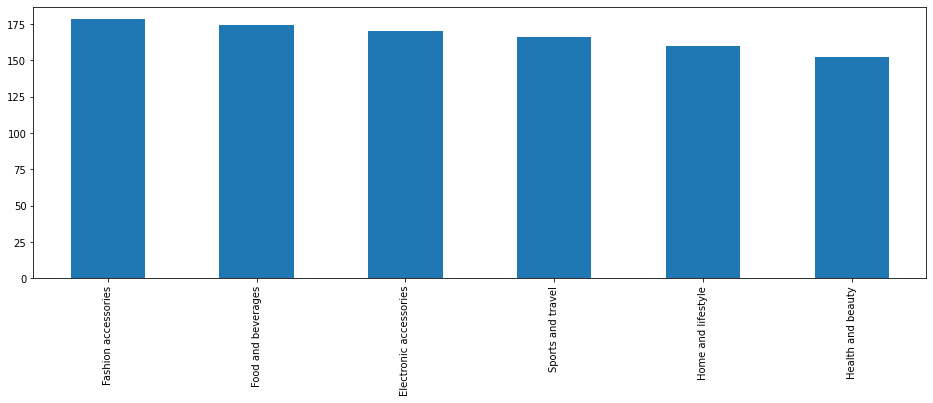

In [109]:
df['Product_line'].value_counts().plot(kind='bar', figsize=(16,5))

Quantidade de produtos vendidos por cada categoria

In [110]:
df.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750678428,A,Yangon,Member,0,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226313081,C,Naypyitaw,Normal,0,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631413108,A,Yangon,Normal,1,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123191176,A,Yangon,Member,1,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373737910,A,Yangon,Normal,1,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [111]:
# Unit_price -> Preço de cada produto em $
df['Unit_price'].dtype

dtype('float64')

In [112]:
df['Unit_price'].describe()

count    1000.000000
mean       55.672130
std        26.494628
min        10.080000
25%        32.875000
50%        55.230000
75%        77.935000
max        99.960000
Name: Unit_price, dtype: float64

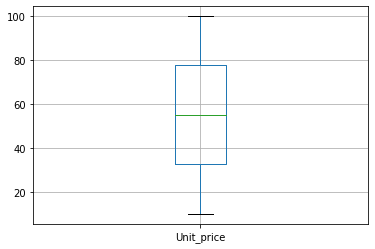

In [113]:
df.boxplot('Unit_price')

#####Vemos que 75% dos produtos custam menos que $78
#####Não há valores discrepantes 

In [114]:
df.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750678428,A,Yangon,Member,0,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226313081,C,Naypyitaw,Normal,0,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631413108,A,Yangon,Normal,1,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123191176,A,Yangon,Member,1,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373737910,A,Yangon,Normal,1,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [115]:
# Quantity -> Número de produtos adquiridos
df['Quantity'].dtype

dtype('int64')

In [116]:
df['Quantity'].unique()

array([ 7,  5,  8,  6, 10,  2,  3,  4,  1,  9])

In [117]:
df.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750678428,A,Yangon,Member,0,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226313081,C,Naypyitaw,Normal,0,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631413108,A,Yangon,Normal,1,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123191176,A,Yangon,Member,1,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373737910,A,Yangon,Normal,1,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [118]:
# Tax_5% ->  taxa de imposto de 5% para compra do cliente
df['Tax_5%'].dtype

dtype('float64')

In [119]:
df['Tax_5%'].describe()

count    1000.000000
mean       15.379369
std        11.708825
min         0.508500
25%         5.924875
50%        12.088000
75%        22.445250
max        49.650000
Name: Tax_5%, dtype: float64

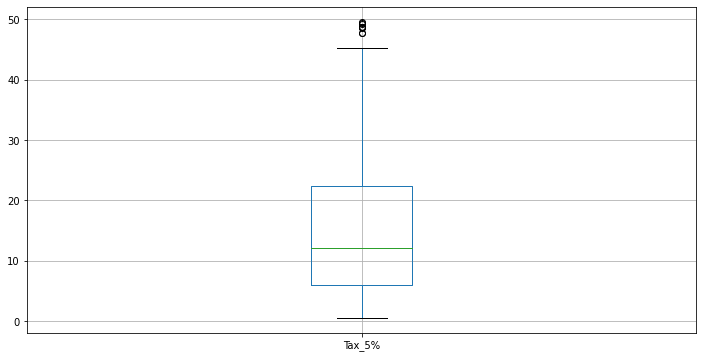

In [120]:
plt.figure(figsize=(12,6))
df.boxplot('Tax_5%')
plt.show()

Há valores discrepantes (reais)

In [121]:
df.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750678428,A,Yangon,Member,0,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226313081,C,Naypyitaw,Normal,0,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631413108,A,Yangon,Normal,1,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123191176,A,Yangon,Member,1,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373737910,A,Yangon,Normal,1,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [122]:
# Total -> preço total incluindo imposto
df['Total'].dtype

dtype('float64')

In [123]:
df['Total'].describe()

count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       253.848000
75%       471.350250
max      1042.650000
Name: Total, dtype: float64

In [125]:
df[df['Total'] >1000]

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
166,234652137,C,Naypyitaw,Normal,1,Home and lifestyle,95.58,10,47.790,1003.590,1/16/2019,13:32,Cash,955.8,4.761905,47.790,4.8
167,687478271,A,Yangon,Normal,1,Fashion accessories,98.98,10,49.490,1039.290,2/8/2019,16:20,Credit card,989.8,4.761905,49.490,8.7
350,860790874,C,Naypyitaw,Member,0,Fashion accessories,99.30,10,49.650,1042.650,2/15/2019,14:53,Credit card,993.0,4.761905,49.650,6.6
357,554422417,C,Naypyitaw,Normal,0,Sports and travel,95.44,10,47.720,1002.120,1/9/2019,13:45,Cash,954.4,4.761905,47.720,5.2
422,271888734,C,Naypyitaw,Member,0,Fashion accessories,97.21,10,48.605,1020.705,2/8/2019,13:00,Credit card,972.1,4.761905,48.605,8.7
557,283265248,C,Naypyitaw,Member,0,Food and beverages,98.52,10,49.260,1034.460,1/30/2019,20:23,Ewallet,985.2,4.761905,49.260,4.5
699,751419720,C,Naypyitaw,Normal,1,Home and lifestyle,97.50,10,48.750,1023.750,1/12/2019,16:18,Ewallet,975.0,4.761905,48.750,8.0
792,744167898,B,Mandalay,Normal,0,Home and lifestyle,97.37,10,48.685,1022.385,1/15/2019,13:48,Credit card,973.7,4.761905,48.685,4.9
996,303962227,B,Mandalay,Normal,0,Home and lifestyle,97.38,10,48.690,1022.490,3/2/2019,17:16,Ewallet,973.8,4.761905,48.690,4.4


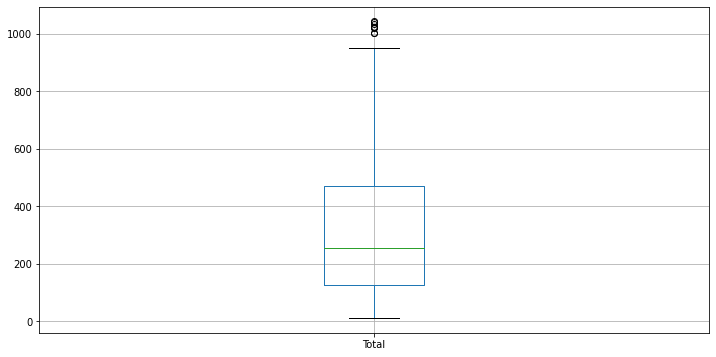

In [128]:
plt.figure(figsize=(12, 6))
df.boxplot('Total')

Vemos que 75% das vendas foram abaixo de $500 

In [129]:
df.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750678428,A,Yangon,Member,0,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226313081,C,Naypyitaw,Normal,0,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631413108,A,Yangon,Normal,1,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123191176,A,Yangon,Member,1,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373737910,A,Yangon,Normal,1,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [130]:
# Date -> Data da compra (Registro disponível de janeiro de 2019 a março de 2019)
df['Date'].dtype

dtype('O')

In [131]:
df['Date'] = pd.to_datetime(df.Date, format='%m/%d/%Y')

In [132]:
df['Date'].dtype

dtype('<M8[ns]')

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice_ID               1000 non-null   int64         
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer_type            1000 non-null   object        
 4   Gender                   1000 non-null   int64         
 5   Product_line             1000 non-null   object        
 6   Unit_price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax_5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [143]:
df.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750678428,A,Yangon,Member,0,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226313081,C,Naypyitaw,Normal,0,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631413108,A,Yangon,Normal,1,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123191176,A,Yangon,Member,1,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373737910,A,Yangon,Normal,1,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [134]:
# Time -> Horário da compra (10h às 21h)
df['Time'].dtype

dtype('O')

In [138]:
df['Time'] = pd.to_datetime(df.Time, format='%H:%M')

In [139]:
df['Time'].dtype

dtype('<M8[ns]')

In [140]:
df.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750678428,A,Yangon,Member,0,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226313081,C,Naypyitaw,Normal,0,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631413108,A,Yangon,Normal,1,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123191176,A,Yangon,Member,1,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373737910,A,Yangon,Normal,1,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


Rever Date e Time !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!



In [144]:
# Payment ->  Pagamento usado pelo cliente para a compra (3 métodos disponíveis - Cash, Credit card and Ewallet)
df['Payment'].dtype

dtype('O')

In [145]:
df['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [146]:
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

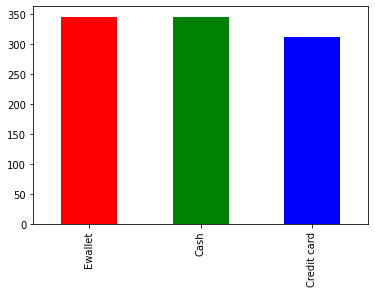

In [147]:
df['Payment'].value_counts().plot(kind='bar', color=['Red', 'Green', 'Blue'])

Vemos que pagamentos por ewallet e cash é praticamente o mesmo, e que pagamentos por Credit Card é  um pouco menor 

In [148]:
df.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750678428,A,Yangon,Member,0,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226313081,C,Naypyitaw,Normal,0,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631413108,A,Yangon,Normal,1,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123191176,A,Yangon,Member,1,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373737910,A,Yangon,Normal,1,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [165]:
# cogs -> Custo dos produtos vendido (Total - Tax_5%)
df['cogs'].dtype

dtype('float64')

In [166]:
df['cogs'].describe()

count    1000.00000
mean      307.58738
std       234.17651
min        10.17000
25%       118.49750
50%       241.76000
75%       448.90500
max       993.00000
Name: cogs, dtype: float64

In [167]:
df.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750678428,A,Yangon,Member,0,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226313081,C,Naypyitaw,Normal,0,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631413108,A,Yangon,Normal,1,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123191176,A,Yangon,Member,1,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373737910,A,Yangon,Normal,1,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [171]:
# gross_margin_percentage -> Porcentagem da margem bruta
df['gross_margin_percentage'].dtype

dtype('float64')

In [172]:
df['gross_margin_percentage'].describe()

count    1.000000e+03
mean     4.761905e+00
std      6.220360e-14
min      4.761905e+00
25%      4.761905e+00
50%      4.761905e+00
75%      4.761905e+00
max      4.761905e+00
Name: gross_margin_percentage, dtype: float64

In [173]:
df.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750678428,A,Yangon,Member,0,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226313081,C,Naypyitaw,Normal,0,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631413108,A,Yangon,Normal,1,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123191176,A,Yangon,Member,1,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373737910,A,Yangon,Normal,1,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [174]:
# gross_income -> Renda bruta
df['gross_income'].dtype

dtype('float64')

In [175]:
df['gross_income'].describe()

count    1000.000000
mean       15.379369
std        11.708825
min         0.508500
25%         5.924875
50%        12.088000
75%        22.445250
max        49.650000
Name: gross_income, dtype: float64

In [176]:
df.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750678428,A,Yangon,Member,0,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226313081,C,Naypyitaw,Normal,0,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631413108,A,Yangon,Normal,1,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123191176,A,Yangon,Member,1,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373737910,A,Yangon,Normal,1,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [177]:
# Rating -> Classificação de estratificação do cliente em sua experiência geral de compra (em uma escala de 1 a 10)
df['Rating'].dtype

dtype('float64')

In [178]:
df['Rating'].describe()

count    1000.00000
mean        6.97270
std         1.71858
min         4.00000
25%         5.50000
50%         7.00000
75%         8.50000
max        10.00000
Name: Rating, dtype: float64

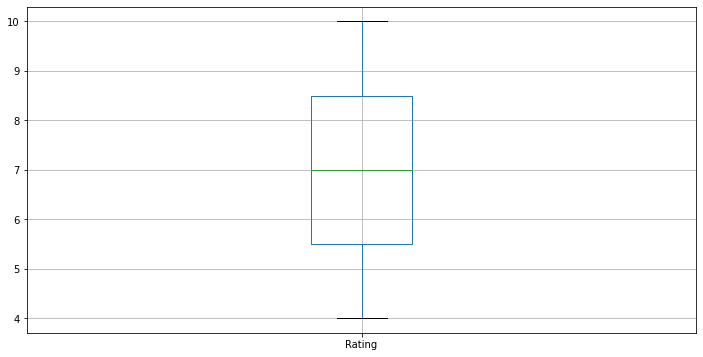

In [180]:
plt.figure(figsize=(12, 6))
df.boxplot('Rating')

Vemos que 75% de=os clientes deram notas entre 4  e 8.5 e a média de votos é 6.97

In [ ]:
# Começar a criar correlações

###Perguntas a responder:

#####Quanto foi vendido em $ por cada categoria?
#####Quantidade de produtos vendidos por categoria?
#####Qual a relação entre Customer_type e Gender?
#####Qual a relação entre Branch e Customer_type?
#####Qual categoria é mais vendida em cada filial?
#####Qual a média dos preços dos produtos para cada categoria?
#####Qual a relação entre Customer_type e Total?
#####Qual a relação entre Total e Payment? (perfil de consumidor)
#####Qual a relação entre Branch e Total?
#####Qual a relação entre Product_line e Quantity?